In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

In [2]:
superheroes = pd.read_csv("superhero_data.csv", parse_dates = ["FIRST_YEAR"])

In [3]:
#introduce the dataframe. From Pandas (pd) library, use DataFrame function and specify the data is coming from 'superheroes'
df = pd.DataFrame(data = superheroes)
print(df)

      UNIVERSE page_id                                   name  \
0           DC    1702             Richard Occult (New Earth)   
1           DC  158200           Arthur Pendragon (New Earth)   
2           DC  289378                   Bedivere (New Earth)   
3           DC   11333  Franklin Delano Roosevelt (New Earth)   
4           DC  342641                     Gareth (New Earth)   
...        ...     ...                                    ...   
23415   MARVEL      ND                  Zola Hulk (Earth-616)   
23416   MARVEL      ND              Zola Iron Man (Earth-616)   
23417   MARVEL      ND                  Zola Thor (Earth-616)   
23418   MARVEL      ND                    Zoltaro (Earth-616)   
23419   MARVEL      ND                Zora Loftus (Earth-616)   

                                     urlslug               ID  \
0                 Richard_Occult_(New_Earth)  Secret Identity   
1               Arthur_Pendragon_(New_Earth)  Public Identity   
2                       

Pick a year to see how many female characters were made before and after that year. 1995


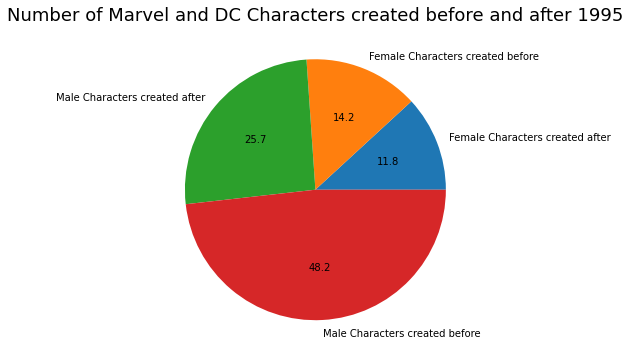

In [4]:
# This question is used to find the where the unequal balances in superheroes was created.
# Enter a year to see how many male and female characters were created before that year and after that year.


list_womensa = []
list_mensa = []
list_womensb = []
list_mensb = []

num_rows = df.shape[0]

over1980 = input("Pick a year to see how many female characters were made before and after that year.")

for row in range(num_rows):
    if(df["FIRST_YEAR"][row]=="ND") or (df["SEX"][row]=="ND"):
        continue
    elif(df["FIRST_YEAR"][row] >= over1980 and (df["SEX"][row] == "Female Characters")):
        list_womensa.append(df["name"][row])

for row in range(num_rows):
    if(df["FIRST_YEAR"][row]=="ND") or (df["SEX"][row]=="ND"):
        continue
    elif(df["FIRST_YEAR"][row] >= over1980 and (df["SEX"][row] == "Male Characters")):
        list_mensa.append(df["name"][row])
        
for row in range(num_rows):
    if(df["FIRST_YEAR"][row]=="ND") or (df["SEX"][row]=="ND"):
        continue
    elif(df["FIRST_YEAR"][row] <= over1980 and (df["SEX"][row] == "Female Characters")):
        list_womensb.append(df["name"][row])

for row in range(num_rows):
    if(df["FIRST_YEAR"][row]=="ND") or (df["SEX"][row]=="ND"):
        continue
    elif(df["FIRST_YEAR"][row] <= over1980 and (df["SEX"][row] == "Male Characters")):
        list_mensb.append(df["name"][row])
        
        
# print the total number of characters in the data
#print("\nTotal number of characters: " + str(len(superhero)))
#print("\nTotal number of female characters created after: " + str(len(list_womensa)))
#print("\nTotal number of males characters created after: " + str(len(list_mensa)))
#print("\nTotal number of female characters created before: " + str(len(list_womensb)))
#print("\nTotal number of males characters created before: " + str(len(list_mensb)))

chart_values = [str(len(list_womensa)),str(len(list_womensb)),str(len(list_mensa)),str(len(list_mensb))]
chart_labels = ["Female Characters created after","Female Characters created before","Male Characters created after","Male Characters created before"]

plt.axis('equal')
plt.title("Number of Marvel and DC Characters created before and after " + over1980, fontsize = 18)
plt.pie(chart_values,labels=chart_labels,autopct='%2.1f')
plt.show()

#Credits codebasics youtube for the idea of setting up the pie chart list. I organized it to list all the string counts but gathered that inspiration from them. 
#Credits I mirrored my first project for inspiration

First pick a characteristic of the superheroes you wish to compare(EYES or HAIR) EYES
Do how do you want to filter your characters(ALIGN, UNIVERSE, or SEX) UNIVERSE


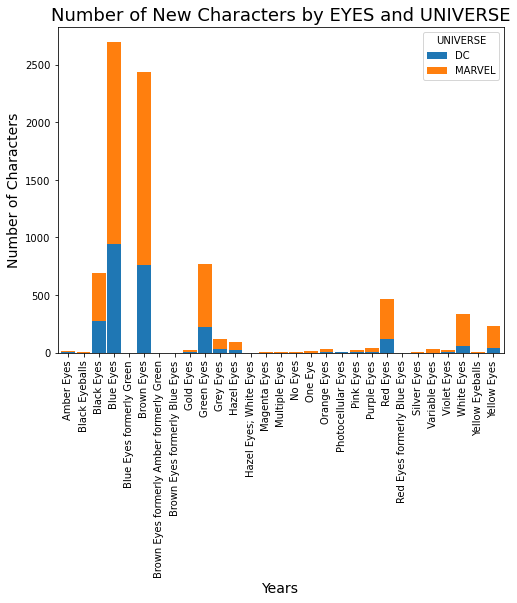

In [5]:
Eyes1 = input("First pick a characteristic of the superheroes you wish to compare(EYES or HAIR)")
Align1 = input("Do how do you want to filter your characters(ALIGN, UNIVERSE, or SEX)")


genderA = superheroes.drop(superheroes[superheroes.SEX == "ND"].index)
genderGL = genderA.drop(genderA[genderA.HAIR == "ND"].index)
genderGF = genderGL.drop(genderGL[genderGL.ALIGN == "ND"].index)
genderT = genderGF.drop(genderGF[genderGF.EYES == "ND"].index)
genderMF = genderT



appearance_by_sex = pd.crosstab(genderMF[Eyes1], genderMF[Align1])
       
    
  

appearance_by_sex.plot(kind= 'bar', stacked= True, width = 0.9)
plt.title("Number of New Characters by " + Eyes1 + " and " + Align1, fontsize = 18)
plt.xlabel("Years", fontsize = 14)
plt.ylabel("Number of Characters", fontsize = 14)

plt.show()

#Credits the inclase comment skeleton for ways to restrict unwanted data

Do how do you want to filter your characters(ALIGN, UNIVERSE, SEX, HAIR, EYES) SEX


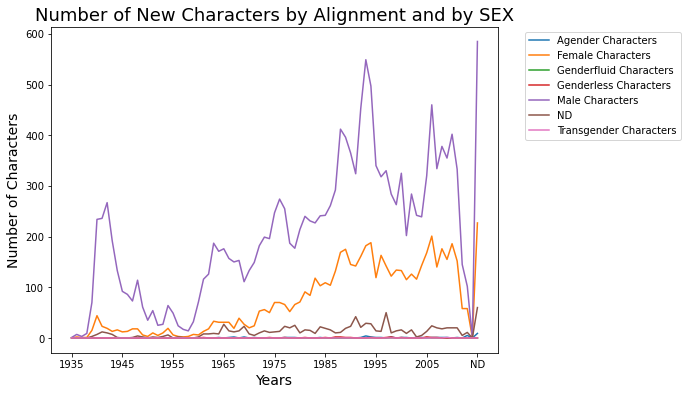

In [6]:
Align1 = input("Do how do you want to filter your characters(ALIGN, UNIVERSE, SEX, HAIR, EYES)")

appearance_by_sex = pd.crosstab(superheroes['FIRST_YEAR'], superheroes[Align1])

appearance_by_sex.plot()
plt.title("Number of New Characters by Alignment and by " + Align1, fontsize = 18)
plt.xlabel("Years", fontsize = 14)
plt.ylabel("Number of Characters", fontsize = 14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#Credits to Kimberly Fessel for learning how to plant the legend outside of the graph. This made sure my information could be easy to read and not blocked by large data sections.